# Fuel Consumption Data Project

## Table of Contents

* Explaining the Data
* Viewing/Cleaning Data 
* Report Questions and Curiosities
* My Work
* Results
* Report Reflections

### Explaining the Data

*Data is from Kaggle, gathered from this dataset: https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

This data contains information on various cars from the year 2000, like for example their make, model, number of cylinders, etc. along with additional measurements on their carbon emissions which I hope to narrow this report on to ask the question on which cars emit more CO2 and what factors may explain those numbers.

### Viewing and Cleaning Data

In [87]:
#Adding Libraries needed for coding
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [88]:
#View at the Data
fuel_data = pd.read_csv("FuelConsumption.csv")
fuel_data.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [89]:
#Viewing Columns
fuel_data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [90]:
#Viewing Info (to check for missing values)
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


#### Reflections so far:

So far, we can see that there are 10 different columns/variables, and that we won't have to do much for cleaning, at there is evidently no missing data in any of the columns nor are any of the columns the wrong data type either. 

The only things I would like to change however would be the "Year" column name, and make it in all caps like the other variables for consistency (though if anything, we could also just delete it altogether here as all values are '2000', but I will keep it here to keep the original data intact), and add some notes on these variables like clarifying the units in another caption or perhaps changing values to make this data more understandable.

I also noticed later on as the project progressed that the 'COEMISSIONS' variable annoyingly had an extra space in it, so I fixed that as well.

In [91]:
#Renaming "Year" column to "YEAR"
fuel_data.rename(columns={'Year':'YEAR', 'COEMISSIONS ':'COEMISSIONS'}, inplace=True)

#### Variable Descriptions:
Year: Year of the car (All are from 2000) \
Make: Make of the Car (e.g. Ford, Acura, Chevrolet, etc.) \
Model: Model of the Car (e.g. Chevrolet Camaro, Ford F150, etc.) \
Vehicle Class: Type of Car based on size and intended use (e.g. Compact, Mid-Size, SUV, etc.) \
Engine Size: Volume of the engine in Liters (L) which is a capacity indicator \
Cylinders: Number of cylinders built within the car which is a performance indicator\
Transmission: Transmission Type of Car (A for Automatic and M for Manual) \
Fuel: The type of fuel that is used by the car (e.g. X, Z, etc.) \
Fuel Consumption: Amount of fuel that is used on average for the car \
Coemissions: CO2 Emissions created from the car

#### Checking for Outliers and other potential Data Worries

In [92]:
fuel_data['MAKE'].value_counts()

MAKE
CHEVROLET        63
FORD             62
DODGE            46
TOYOTA           43
GMC              38
VOLKSWAGEN       36
BMW              29
AUDI             22
MERCEDES-BENZ    22
PONTIAC          21
VOLVO            21
MAZDA            20
CHRYSLER         19
NISSAN           19
HONDA            17
SATURN           15
SUZUKI           13
SUBARU           12
DAEWOO           10
HYUNDAI          10
JAGUAR           10
ACURA             9
SAAB              9
ISUZU             8
PORSCHE           8
JEEP              8
LEXUS             7
FERRARI           7
BUICK             6
LINCOLN           6
OLDSMOBILE        5
CADILLAC          5
LAND ROVER        4
KIA               4
INFINITI          4
PLYMOUTH          1
Name: count, dtype: int64

In [93]:
fuel_data['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     105
SUBCOMPACT                  104
SUV                          97
PICKUP TRUCK - STANDARD      92
MID-SIZE                     77
FULL-SIZE                    28
MINIVAN                      26
STATION WAGON - MID-SIZE     25
VAN - CARGO                  23
VAN - PASSENGER              17
STATION WAGON - SMALL        13
MINICOMPACT                  11
PICKUP TRUCK - SMALL         11
TWO-SEATER                   10
Name: count, dtype: int64

In [94]:
fuel_data['ENGINE SIZE'].value_counts()

ENGINE SIZE
2.0    56
4.3    45
1.8    37
3.0    37
4.0    33
2.5    31
2.4    31
2.8    29
2.2    26
3.8    26
2.3    21
3.4    20
4.6    19
3.3    18
3.2    17
1.9    16
1.6    15
2.7    14
5.7    13
4.8    12
5.3    12
3.5     9
4.2     9
5.4     9
5.2     9
5.9     9
3.9     9
4.7     9
5.0     8
5.5     6
1.3     6
4.4     6
1.5     6
1.0     3
3.1     3
6.0     3
4.9     2
8.0     2
3.6     2
2.9     1
Name: count, dtype: int64

In [95]:
fuel_data['CYLINDERS'].value_counts()

CYLINDERS
6     263
4     209
8     136
5      19
12      7
3       3
10      2
Name: count, dtype: int64

In [96]:
fuel_data['TRANSMISSION'].value_counts()

TRANSMISSION
A4     324
M5     191
A5      73
M6      23
AS4     12
A3      10
AS5      5
AS6      1
Name: count, dtype: int64

In [97]:
fuel_data['FUEL'].value_counts()

FUEL
X    454
Z    176
D      6
E      2
N      1
Name: count, dtype: int64

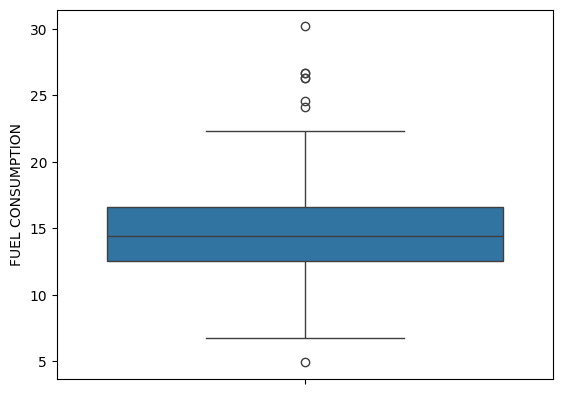

<Figure size 640x480 with 0 Axes>

In [98]:
plt.figure()
sns.boxplot(fuel_data["FUEL CONSUMPTION"])
plt.show()
plt.clf()

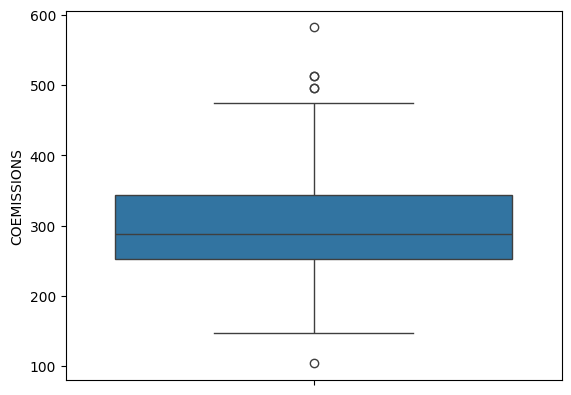

<Figure size 640x480 with 0 Axes>

In [99]:
plt.figure()
sns.boxplot(fuel_data["COEMISSIONS"])
plt.show()
plt.clf()

#### Final Thoughts before Asking Questions

Moving from here, I only wish that there was a bit more information that we can go off of for the variables, specifically more information about and what units are for the COEMISSIONS, FUEL CONSUMPTION, and FUEL variables. Aside from that, we do have a few outliers in the last two variables, which in this case I would like to explore to see what cars in particular are those outliers to give information on what cars emit more CO2 and/or use more fuel than others.

In general, the data appears to be good to go from here, but of course I will correct and mention any other fixes that come up later as they arrive.

### Report Questions and Curiosities

For this project, I decided to simply follow the questions below:

* What cars produce more CO2 than others? In particular, how do these factors impact CO2 emissions:
    * Car Make
    * Transmission Type (Automatic vs. Manual)
    * Vehicle Class
    * Fuel Type
    * Engine Size
    * Cylinders
* What cars consume more fuel than others? In particular, how do these factors impact consumption:
    * Car Make
    * Transmission Type (Automatic vs. Manual)
    * Vehicle Class
    * Fuel Type
    * Engine Size
    * Cylinders
 
With these questions in mind, I mainly hope to discover the true performance and environmental differences between these cars, and ultimately provide the findings I made and offer suggestions for further investigation into more modern cars.

### My Work

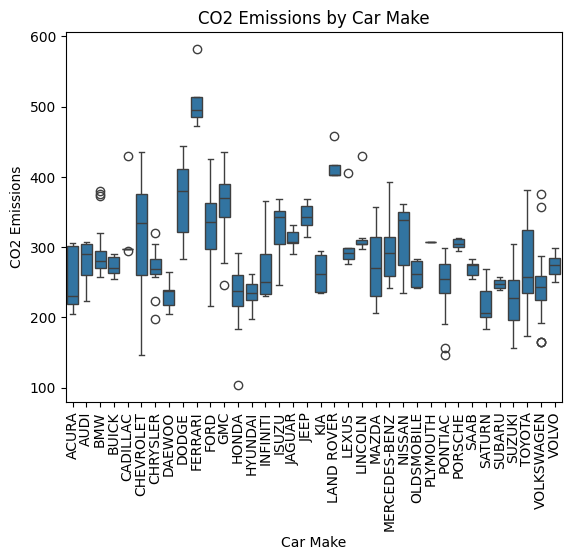

In [100]:
#Emissions v. Car Make
plt.figure()
sns.boxplot(x = 'MAKE', y = 'COEMISSIONS', data = fuel_data)
plt.xticks(rotation = 90)
plt.ylabel('CO2 Emissions')
plt.xlabel('Car Make')
plt.title('CO2 Emissions by Car Make')
plt.show()

From this chart, we can tell that Chevrolet definitely has the largest range of any make when it comes to CO2 Emissions, but we can also tell that Ferrari appears to have the highest CO2 emissions on average, with one of their outliers being the car with the most emissions. Other than that, we can see that more or less the average for all these makes may average around the 250-300 mark on this chart and also that Honda appears to have a notably lower CO2 emission level, with one of their cars having the lowest emissions in this data.

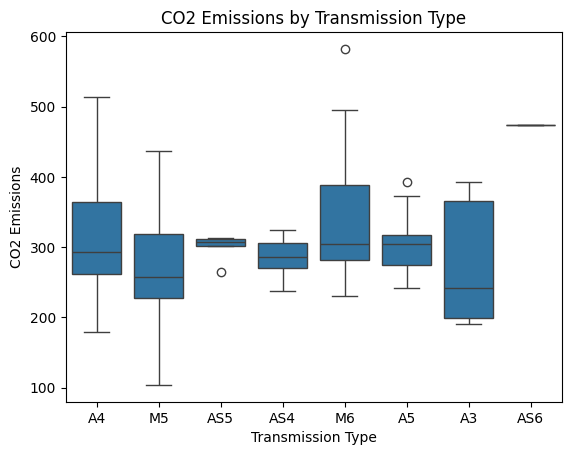

In [101]:
#Emissions v. Transmission Type
plt.figure()
sns.boxplot(x = 'TRANSMISSION', y = 'COEMISSIONS', data = fuel_data)
plt.ylabel('CO2 Emissions')
plt.xlabel('Transmission Type')
plt.title('CO2 Emissions by Transmission Type')
plt.show()

Based on this chart, we can see that there may not be any substantial difference in CO2 emissions between these transmission types along with A4 (an automatic type) and M5 (a manual type) having a similarly large range in CO2 emissions. Though the M6 (manual) transmission type appears to have an outlier with the highest CO2 emission value in this chart.

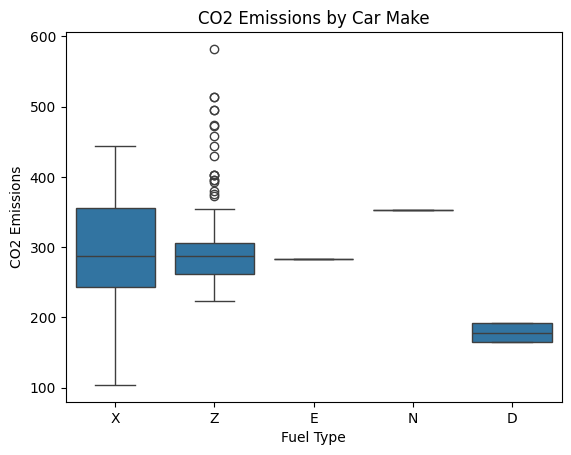

In [102]:
#Emissions v. Fuel Type
plt.figure()
sns.boxplot(x = 'FUEL', y = 'COEMISSIONS', data = fuel_data)
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Type')
plt.title('CO2 Emissions by Car Make')
plt.show()

I wish I knew more about the units here or what exactly are these fuel types, but we can see that most have an unusually small range except for X, as well as Z with its many outliers.

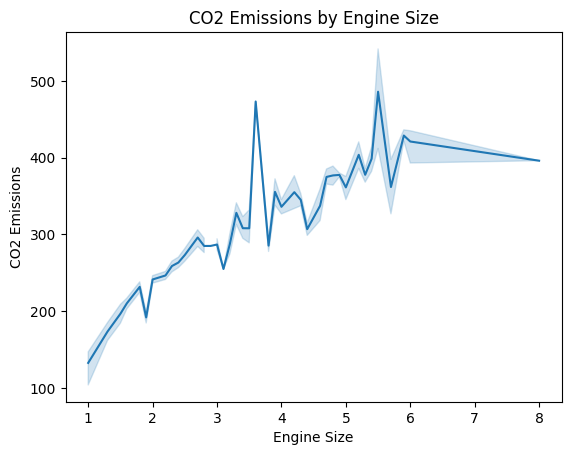

In [110]:
#Emissions v. Engine Size
plt.figure()
sns.lineplot(x = 'ENGINE SIZE', y = 'COEMISSIONS', data = fuel_data)
plt.ylabel('CO2 Emissions')
plt.xlabel('Engine Size')
plt.title('CO2 Emissions by Engine Size')
plt.show()

According to this chart, there appears to be a clear positive relationship between the two variables indicating that overall, as Engine Size increases, CO2 emissions will also increase as well with a few exceptions being higher or lower than the expected value.

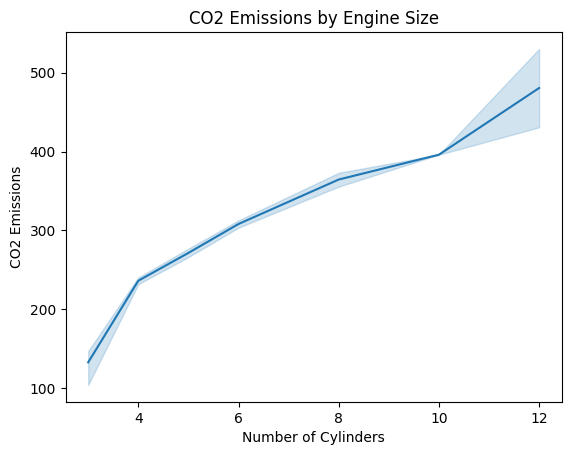

In [111]:
#Emissions v. Cylinders
plt.figure()
sns.lineplot(x = 'CYLINDERS', y = 'COEMISSIONS', data = fuel_data)
plt.ylabel('CO2 Emissions')
plt.xlabel('Number of Cylinders')
plt.title('CO2 Emissions by Engine Size')
plt.show()

In this chart, we also observe a similar positive relationship as the one for the Engine Size, where as the number of cylinders on a car increases, so does the CO2 emissions of the car, though with fewer exceptions than the chart with Engine Size.

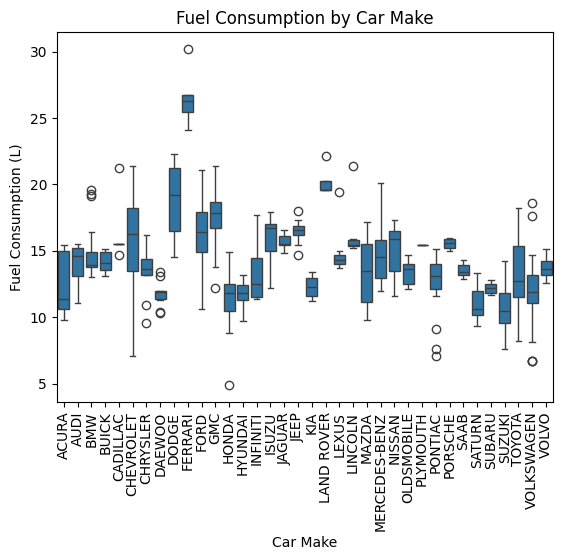

In [105]:
#Fuel Consumption v. Car Make
plt.figure()
sns.boxplot(x = 'MAKE', y = 'FUEL CONSUMPTION', data = fuel_data)
plt.xticks(rotation = 90)
plt.ylabel('Fuel Consumption (L)')
plt.xlabel('Car Make')
plt.title('Fuel Consumption by Car Make')
plt.show()

According to this chart, we see a similar chart like the one comparing CO2 emissions to Car Make with Chevrolet, Ferrari, and Honda being notably different from other makes here, possibly indicating strongly a relationship that as Fuel Consumption increases, so does CO2 emissions.

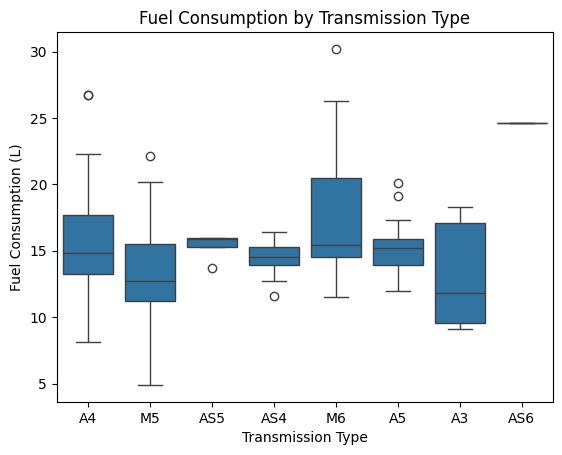

In [112]:
#Fuel Consumption v. Transmission Type
plt.figure()
sns.boxplot(x = 'TRANSMISSION', y = 'FUEL CONSUMPTION', data = fuel_data)
plt.ylabel('Fuel Consumption (L)')
plt.xlabel('Transmission Type')
plt.title('Fuel Consumption by Transmission Type')
plt.show()

Similar pattern as observed in CO2 emissions v. Transmission Type.

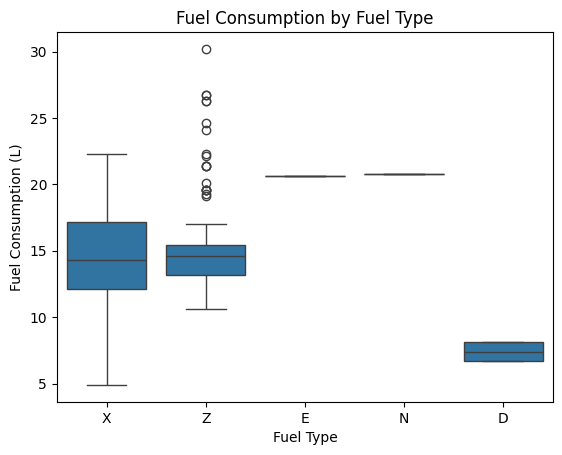

In [107]:
#Fuel Consumption v. Fuel Type
plt.figure()
sns.boxplot(x = 'FUEL', y = 'FUEL CONSUMPTION', data = fuel_data)
plt.ylabel('Fuel Consumption (L)')
plt.xlabel('Fuel Type')
plt.title('Fuel Consumption by Fuel Type')
plt.show()

Similar pattern as observed in CO2 emissions v. Fuel Type.

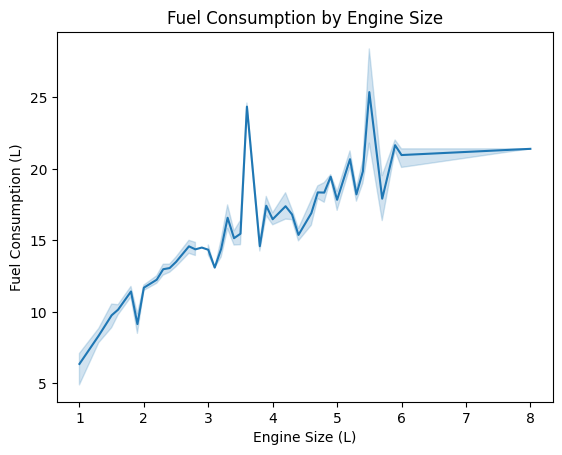

In [113]:
#Fuel Consumption v. Engine Size
plt.figure()
sns.lineplot(x = 'ENGINE SIZE', y = 'FUEL CONSUMPTION', data = fuel_data)
plt.ylabel('Fuel Consumption (L)')
plt.xlabel('Engine Size (L)')
plt.title('Fuel Consumption by Engine Size')
plt.show()

Similar pattern as observed in CO2 emissions v. Engine Size.

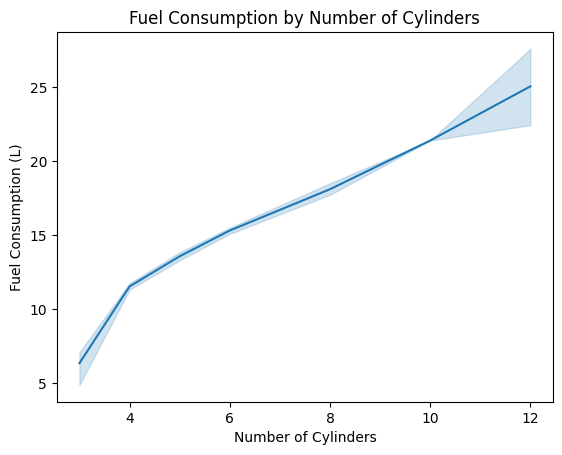

In [114]:
#Fuel Consumption v. Cylinders
plt.figure()
sns.lineplot(x = 'CYLINDERS', y = 'FUEL CONSUMPTION', data = fuel_data)
plt.ylabel('Fuel Consumption (L)')
plt.xlabel('Number of Cylinders')
plt.title('Fuel Consumption by Number of Cylinders')
plt.show()

Similar pattern as observed in CO2 emissions v. Cylinders.

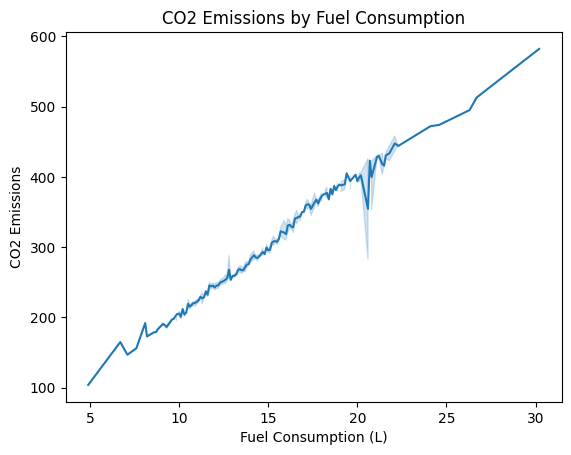

In [115]:
#CO2 Emissions v. Fuel Consumption
plt.figure()
sns.lineplot(x = 'FUEL CONSUMPTION', y = 'COEMISSIONS', data = fuel_data)
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel Consumption (L)')
plt.title('CO2 Emissions by Fuel Consumption')
plt.show()

### Results

Based on the preliminary analysis conducted throughout my work, I can conclude that as Fuel Consumption, Number of Cylinders and Engine Size increase, so do CO2 emissions. Additionally, I would add (it may be one that is obvious, but I believe is nonetheless confirmed here) the strong relationship between Fuel Consumption and CO2 Emissions which indicates that as fuel consumption increases, so do emissions.

And in addition to this, we do see some exceptions of cars that will produce less CO2 emissions/consume less fuel like Honda cars and others with smaller engine size and lower number of cylinders. As for cars that will produce notably more emissions and use up more fuel this will likely be cars like Ferraris and Dodges along with cars with larger engine sizes and higher numbers of cylinders.

As for connections I wish I could have made and clarified more on if I had more information, I noticed that the X fuel type has a notably large range of CO2 emissions, but that D has a notably low range for emissions. And finally, I also wish I had units to measure the CO2 emissions most effectively, as this is an area of study that is new to me and something I hoped to have more information on.

### Report Reflections

For further investigation, I definitely would like to have data that is more recent or at least data that covers multiple years as many new cars have been made since 2000 (24 years ago as of the making of this report!) along with innovations that might have significantly affected different factors, like for example developments that might have made cars with larger numnbers of cylinders or larger engine sizes produce more or less CO2 emissions.

I would also like to use up data with a more updated fuel type, especially with the advent of electric and hybrid cars in the last decade or so and perhaps have data on the CO2 emissions that might also be produced with the production of charging stations, using up regular power outlets for electric 